### Package that I used

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Import data

In [54]:
import pandas as pd

df = pd.read_csv('wdbc.data',header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [55]:
df.columns = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
df

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Data Clean and define the varaibles


In [56]:

#define dependent variables
x = df.drop(["id","diagnosis"],axis = 1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
#define independent variables

y = df.diagnosis

y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [58]:
#we'll do the bivariate analysis here, first of all I'll need to transform the data type of diagnosis variables 
#from character into float.
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y1 = lb.fit_transform(y).ravel()
y1 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### EAD

In [59]:
#here we can see the difference of range amoung each variable.
#Some range of variable is within dcimal points and some is in hundred digit so we might need to scale it.

x.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [60]:
#check how how many datapoint is benign  in our dataset

df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [61]:
#check data type we can see that all columns ara float 
x.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [62]:
df.shape

(569, 32)

In [63]:
df.isnull().sum()

id                         0
diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

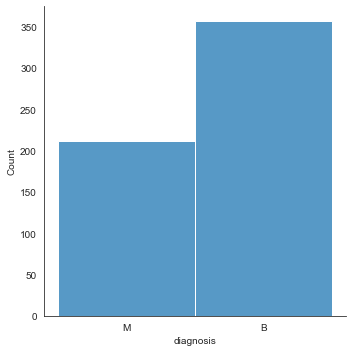

In [64]:
#bivariate analysis
import seaborn as sns

sns.displot(df["diagnosis"])


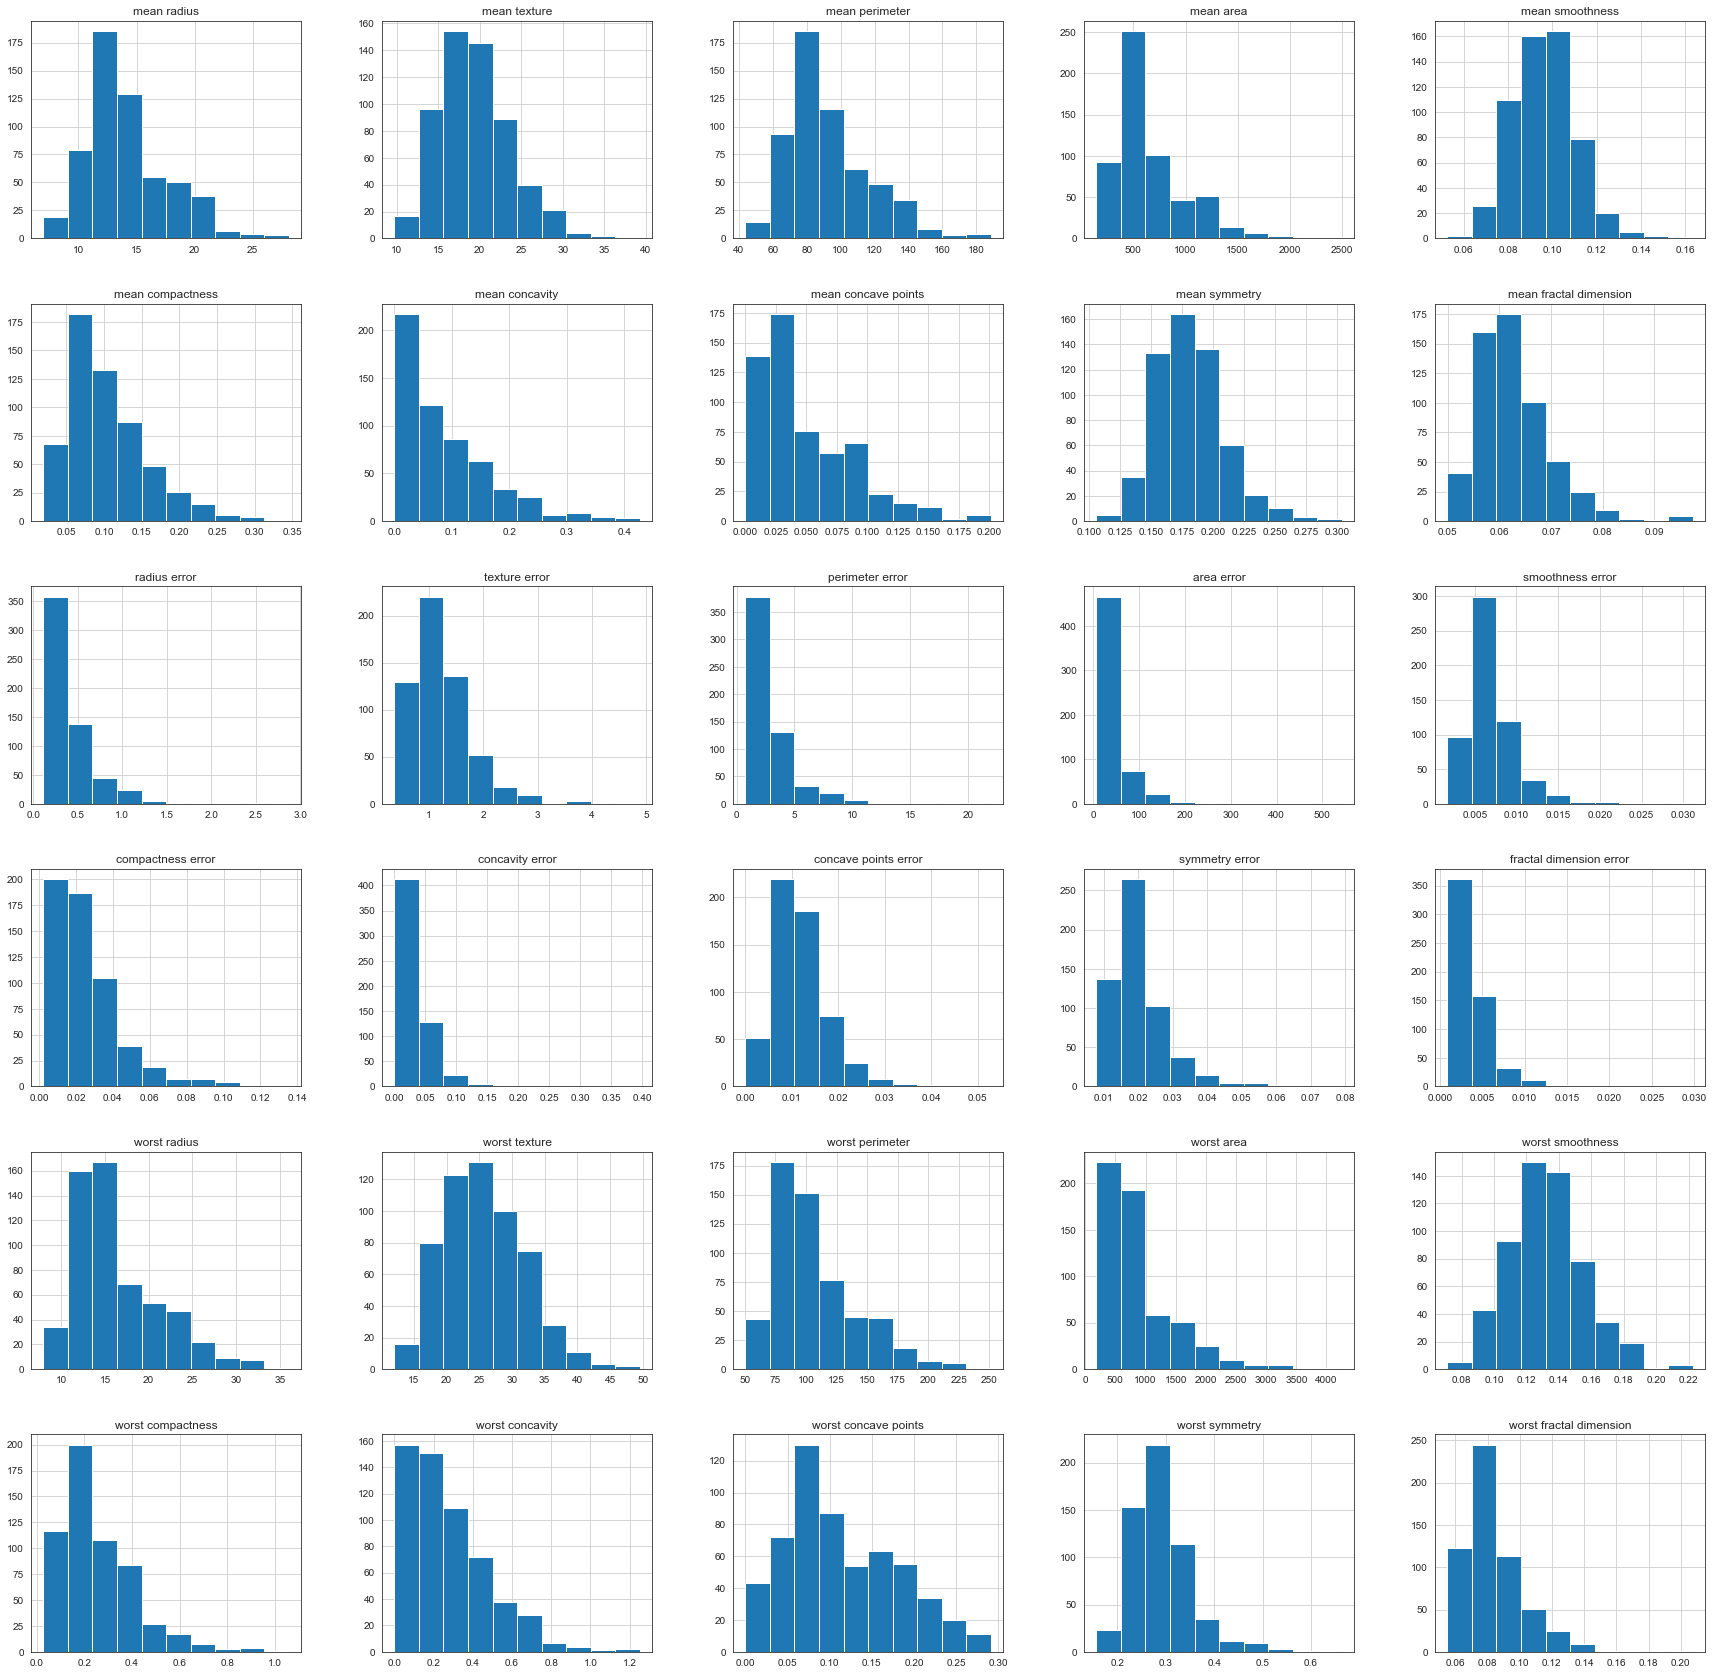

In [65]:
#multivariate analysisd
x.hist( figsize = (30,30));

In [66]:
# we can also check the boxplot to see the distribution of each variables
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
#sns.boxplot(data = x.drop(["mean area","worst area","area error","mean perimeter","worst perimeter"],axis =1 ),orient='h')

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

Then we could check the correlation between each varaibles

There are strong correlation between these two variables: 
,mean radius - mean perimete 
,mean radius-mean area 
,mean radius-worst radius 
,mean radius-worst perimeter 
,mean radius- worst area 
,mean perimeter-mean area 
,mean perimeter-mean radius 
,mean perimeter-worst texture 
,mean area-worst radius 
,worst area- mean area 
,mean concavity-mean concave points 
,worst concave points- mean concavity
,cor=x.corr()

<AxesSubplot:>

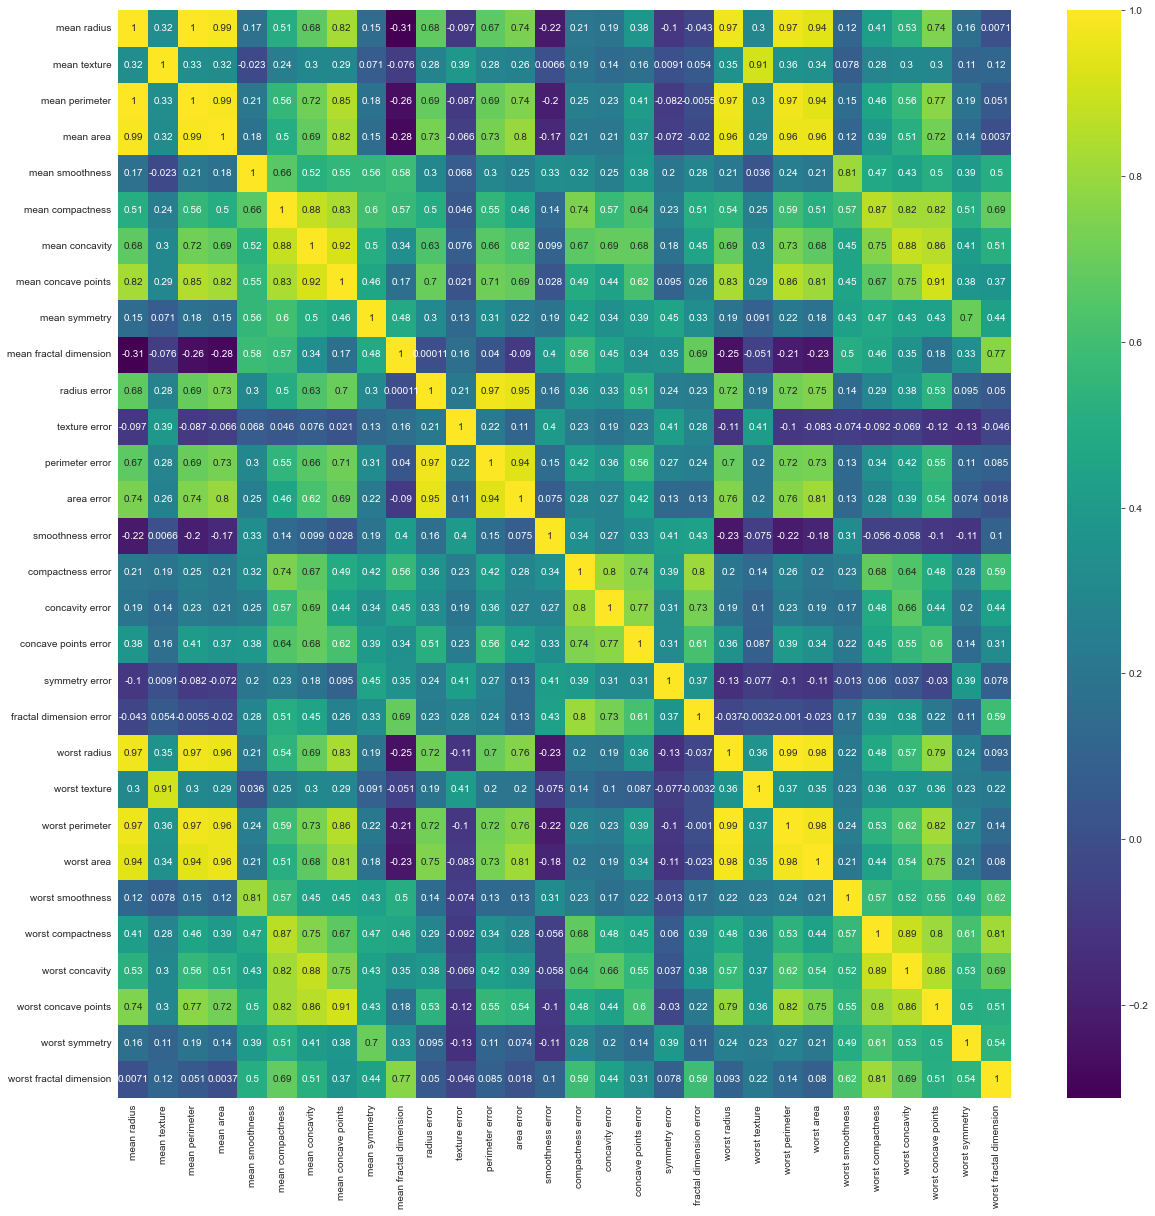

In [67]:
import matplotlib.pyplot as plt
cor = x.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor,annot =True , cmap = "viridis")

#### Split data into training and test sets

In [68]:
#split the data into training dataset and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55, test_size = 0.3 )

#### Logistic regression analysis

In [69]:
# initiate a logistic regression model with penal
#we’ll try  a sequence of parameters  for C:
#C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]. C is the inverse of the regularization parameter 𝜆
#C increases, the penalty decreases.
#apply L1 lasso penalty which is the sum of the square values of the coefficients 
#fit the model
# check the accuracy of the model


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]


accuracy_train= []
accuracy_test = []
for c in C_list:
    clf = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=c)
    clf.fit(x_train, y_train)
    pred_train_c = clf.predict(x_train)
    pred_test_c = clf.predict(x_test)
    accuracy_train.append(metrics.accuracy_score( y_train,  pred_train_c))
    accuracy_test.append(metrics.accuracy_score( y_test, pred_test_c))


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

So here we could plot the accuracy for training dataset and testing data set,
We could choose the parameter c with the highest accuracy score in both training and testing dataset to build our model.

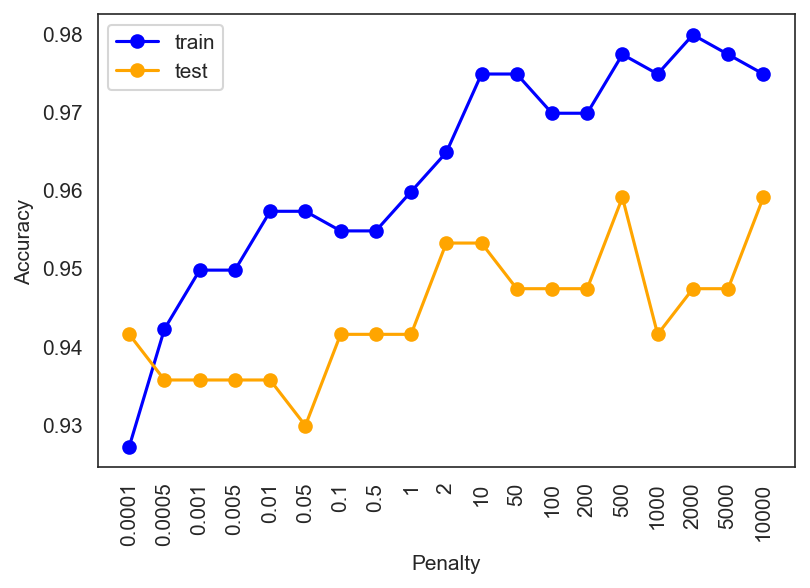

In [76]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test, color='orange', marker='o', label = 'test')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list,rotation=90)
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
#build the model with c =500
clf = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=500)
clf.fit(x_train, y_train)
pred_train_c = clf.predict(x_train)
pred_test_c = clf.predict(x_test)
print(metrics.classification_report(y_test, pred_test_c))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97       102
           M       0.94      0.96      0.95        69

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


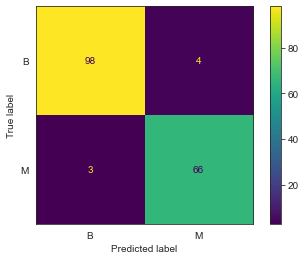

In [74]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_test_c)

#### KNN Analysis
We’ll build the K-NN model by a sequence of parameters K (n_neighbors): K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49].


In [79]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_train_k= []
accuracy_test_k = []
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]
for n in K_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
#Make predictions
    pred_train_k = knn.predict(x_train)
    pred_test_k = knn.predict(x_test)
    accuracy_train_k.append(metrics.accuracy_score( y_train,  pred_train_k))
    accuracy_test_k.append(metrics.accuracy_score( y_test,  pred_test_k))

So here we could plot the accuracy for training dataset and testing data set,
We could choose the parameter n_neighbors with the highest accuracy score in both training and testing dataset to build our model.

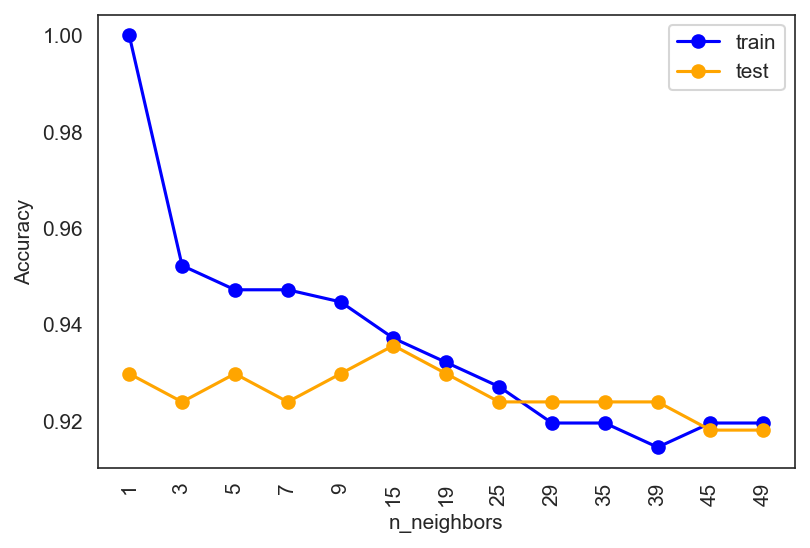

In [80]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train_k, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test_k, color='orange', marker='o', label = 'test')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list,rotation=90)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train)

pred_train_k = knn.predict(x_train)
pred_test_k = knn.predict(x_test)

In [84]:
print(metrics.classification_report(y_test, pred_test_k))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93       102
           M       0.95      0.84      0.89        69

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



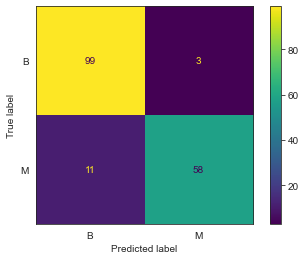

In [83]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_test_k)